<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/Salary_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Validate Data


In [169]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [170]:
# Data Type of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [171]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [172]:
# Total number of records with null values
total_null_records = df.isnull().any(axis=1).sum()
print("\nTotal number of records with null values:", total_null_records)


Total number of records with null values: 6


In [173]:
df=df.dropna()

## find unique values

In [174]:
cat_col=df.select_dtypes(include=['object']).columns.tolist()
cat_col

['Gender', 'Education Level', 'Job Title']

In [175]:
for col in cat_col:
  print(col,df[col].unique())

Gender ['Male' 'Female' 'Other']
Education Level ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Job Title ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Man

In [176]:
# remove inconsistencies in education level
#This selects rows from the 'Education Level' column of the DataFrame df where the boolean mask is True, and sets the value of these selected rows to 'ne.

df.loc[(df['Education Level']=="Master's") | (df['Education Level']=="Master's Degree"),'Education Level']='Master'
df.loc[(df['Education Level']=="Bachelor's") | (df['Education Level']=="Bachelor's Degree"),'Education Level']='Bachelor'
df.loc[df['Education Level']=="phD",'Education Level']='PhD'

In [177]:
df['Education Level'].unique()

array(['Bachelor', 'Master', 'PhD', 'High School'], dtype=object)

In [178]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


# EDA

## Univariate Analysis

### Distribution of Gender

In [179]:
df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

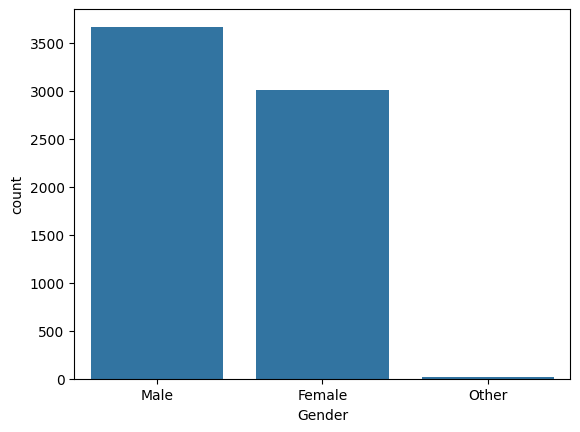

In [180]:
sns.countplot(x='Gender',data=df)

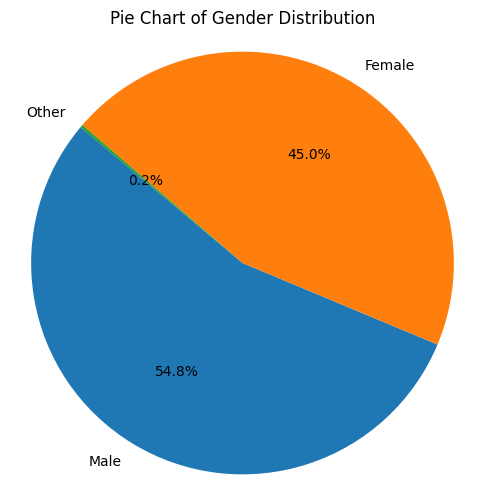

In [181]:
# Assuming df is your DataFrame
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Distribution of Education Levels

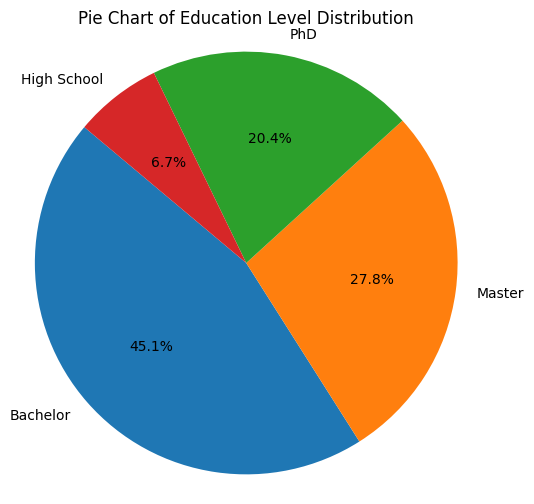

In [182]:



edulevel_counts=df['Education Level'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(edulevel_counts,labels=edulevel_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Pie Chart of Education Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Distribution of Numeric Variables


In [183]:
num_col=df.select_dtypes(include=['float','int']).columns.tolist()
num_col

['Age', 'Years of Experience', 'Salary']

In [184]:
(df['Years of Experience'].max()- df['Years of Experience'].min())/10

3.4

### Top 10 Popular Job Titles


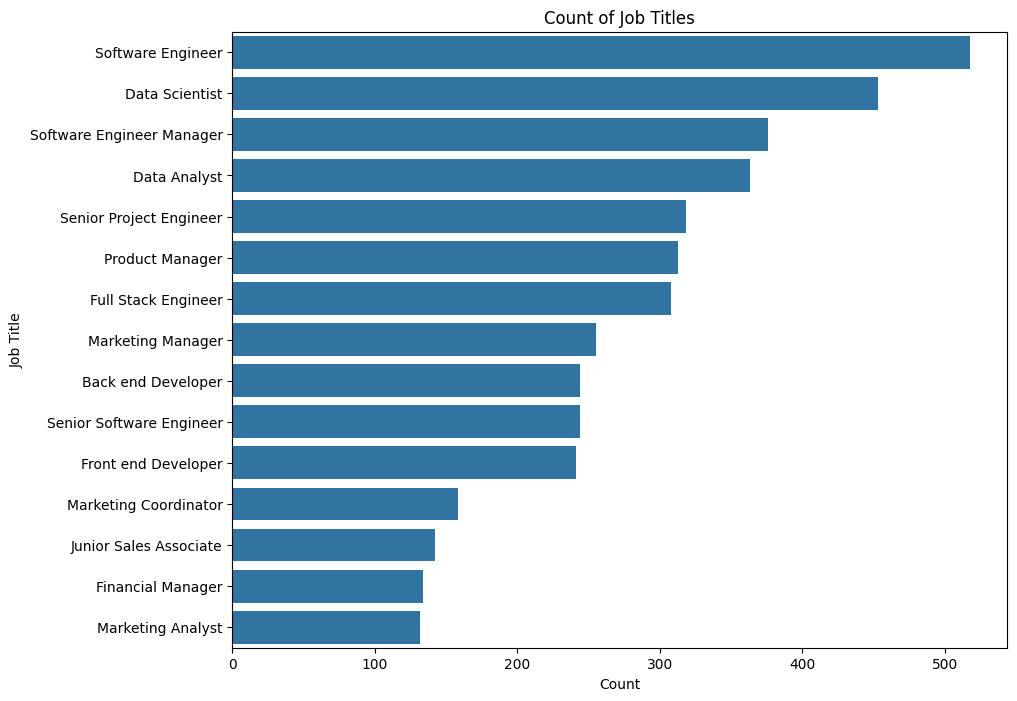

In [185]:
job_title_counts = df['Job Title'].value_counts()
# Select only the top 15 categories
top_15_job_title_counts = job_title_counts[:15]
# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_15_job_title_counts.values, y=top_15_job_title_counts.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Count of Job Titles')
plt.show()

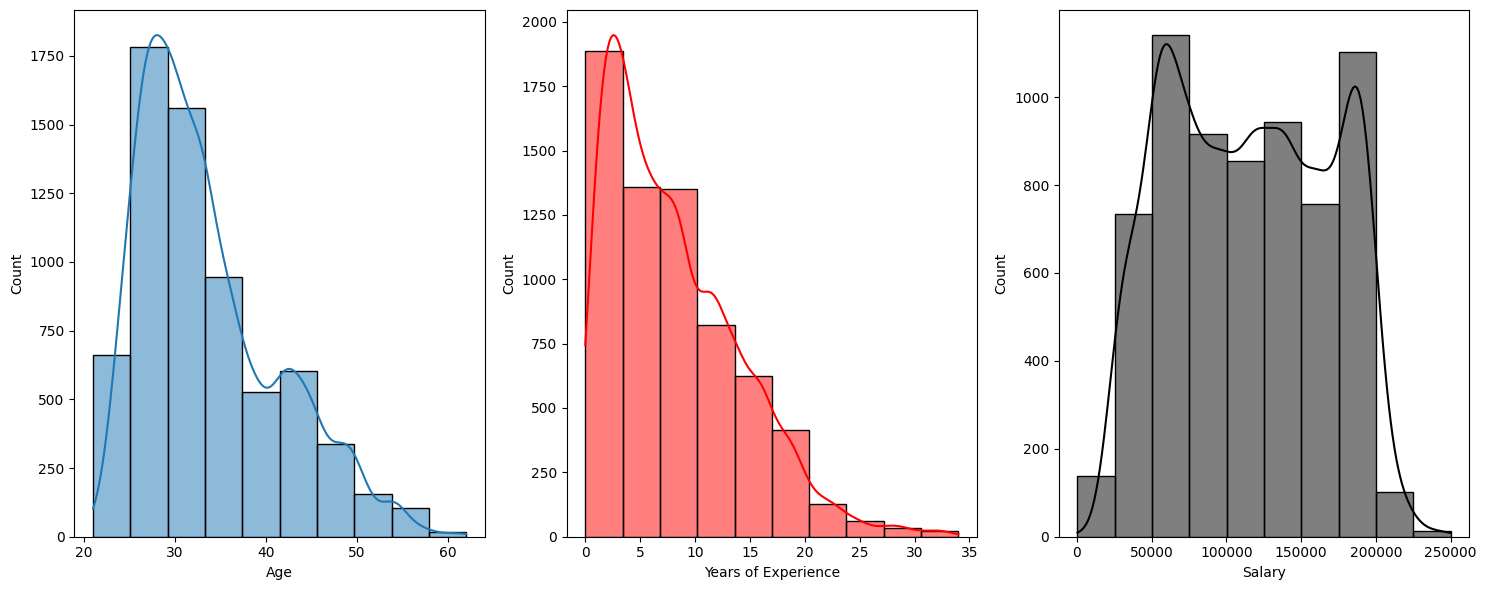

In [186]:
# plt.figure(figsize=(10, 8))
# Create a grid of subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

ax1=axes[0]
sns.histplot(x='Age',data=df,kde=True,bins =10,ax=ax1)


ax2=axes[1]
sns.histplot(x='Years of Experience',data=df,kde=True,bins=10,ax=ax2,color='red')

ax3=axes[2]
sns.histplot(x='Salary',data=df,kde=True,bins=10,ax=ax3,color='black')
plt.tight_layout()

plt.show()

## Bivariate Analysis

### Average  Salary Earned By each Gender¶

In [187]:
# Mean salary earned by males and females
Mean_Salary = df.groupby('Gender')['Salary'].mean().reset_index()
Mean_Salary.columns = ['Gender', 'Salary']
Mean_Salary

,Gender,Salary
0,Female,107888.998672
1,Male,121395.697630
2,Other,125869.857143


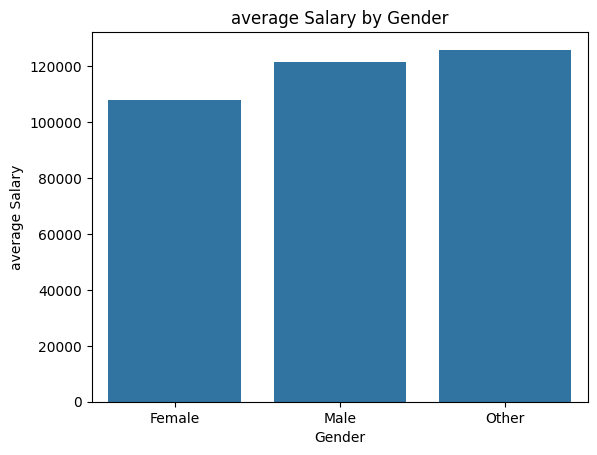

In [188]:
sns.barplot(data=Mean_Salary, x='Gender', y='Salary')
plt.xlabel('Gender')
plt.ylabel('average Salary')
plt.title('average Salary by Gender')
plt.show()

### boxplot for genderwise salary


<Axes: xlabel='Gender', ylabel='Salary'>

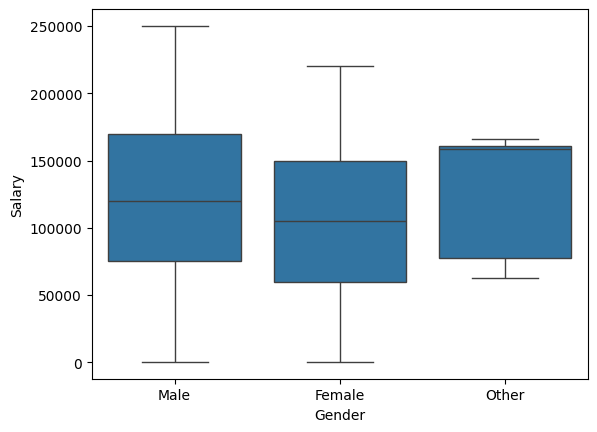

In [189]:
sns.boxplot(x='Gender',y='Salary',data=df)

### boxplot for education wise salary

<Axes: xlabel='Education Level', ylabel='Salary'>

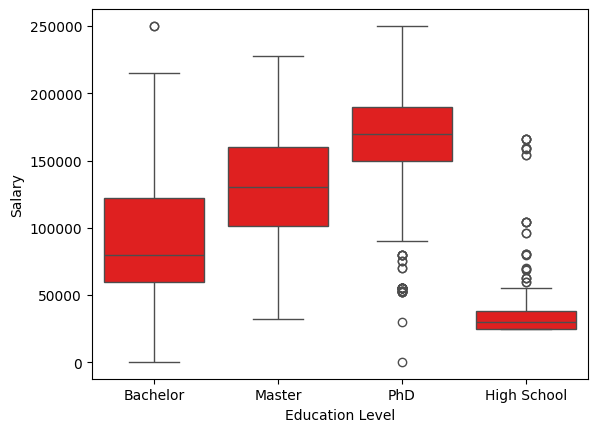

In [190]:
sns.boxplot(x='Education Level',y='Salary',data=df,color='red')

### scatter plot for age and salary

<Axes: xlabel='Age', ylabel='Salary'>

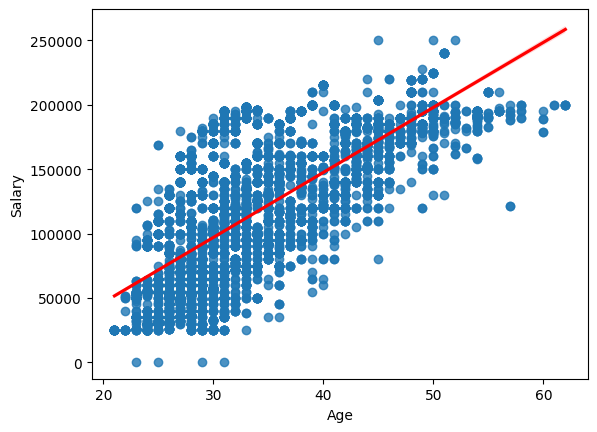

In [191]:
sns.regplot(x='Age',y='Salary',data=df,line_kws={'color': 'red'})

### scatter plot for age and salary


<Axes: xlabel='Years of Experience', ylabel='Salary'>

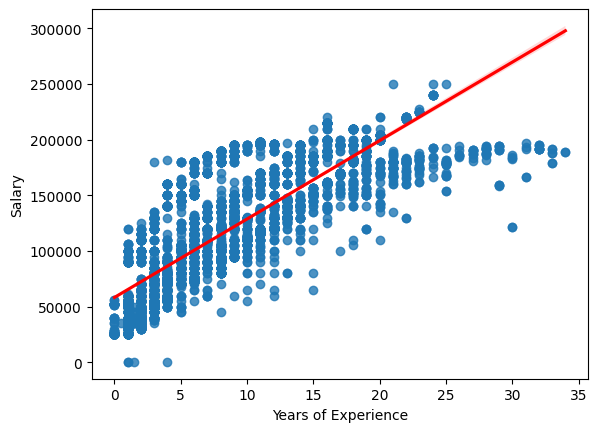

In [192]:
sns.regplot(x='Years of Experience',y='Salary',data=df,line_kws={'color': 'red'})

<Axes: xlabel='Age', ylabel='Years of Experience'>

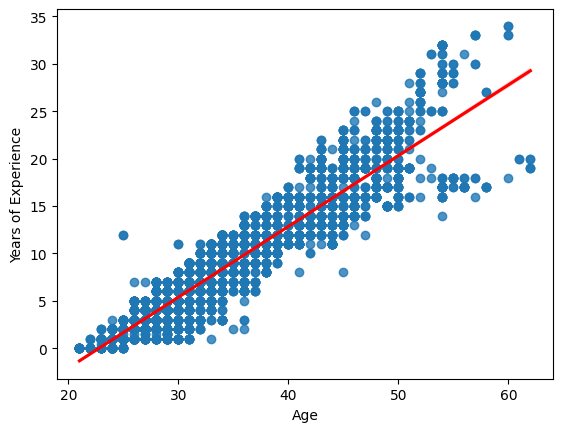

In [193]:
sns.regplot(y='Years of Experience',x='Age',data=df,line_kws={'color': 'red'})

## Pairplot

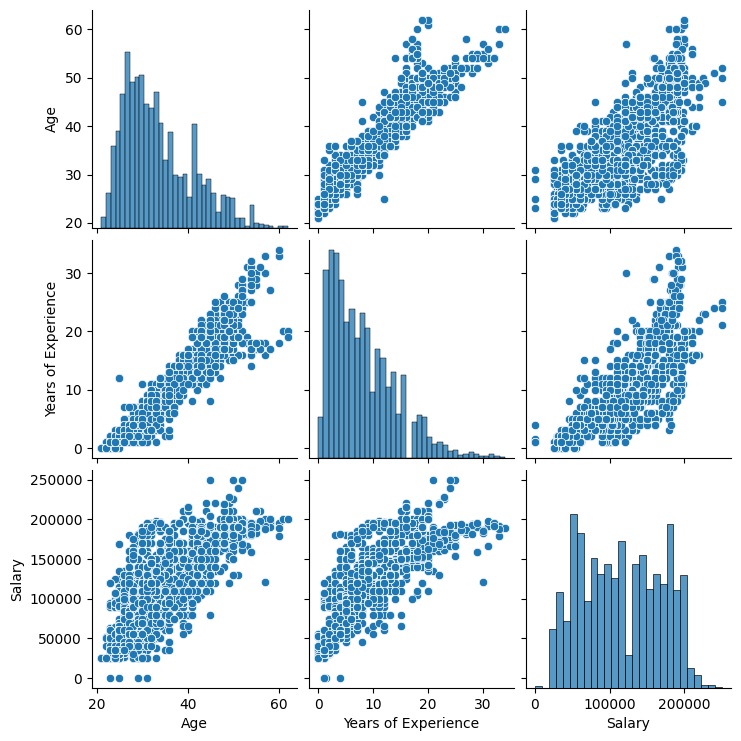

In [197]:
sns.pairplot(df)

### Top 10 Popular jobs with salary Range

<ipython-input-194-91b354a93e7f>:9: UserWarning:


The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.



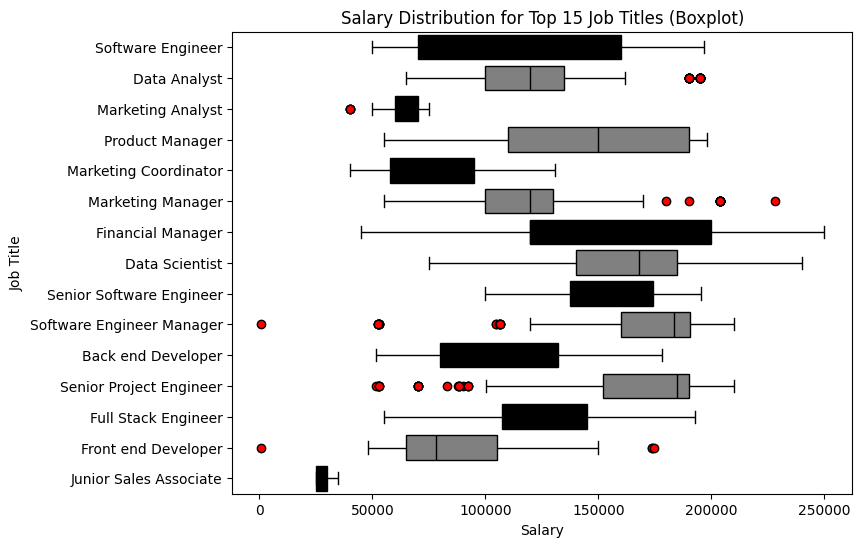

In [194]:
# Filter the DataFrame to include only the top 15 job titles

df_top_15 = df[df['Job Title'].isin(top_15_job_title_counts.index)]

# Create a boxplot for the top 15 job titles
dual_tone_palette = ["black", "grey"]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Salary', y='Job Title', data=df_top_15,palette=dual_tone_palette,hue='Job Title', flierprops=dict(markerfacecolor="red"))
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.title('Salary Distribution for Top 15 Job Titles (Boxplot)')
plt.show()


### top 5 highest paying jobs within the top 15 popular job categories

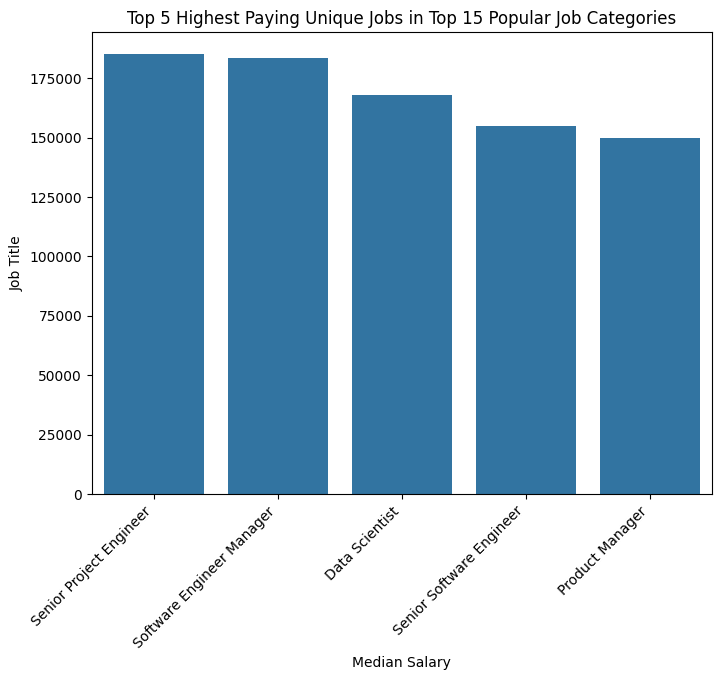

In [195]:


# Step 1: Calculate the count of each job title
job_title_counts = df['Job Title'].value_counts()

# Step 2: Select the top 15 job titles based on their count
top_15_job_titles = job_title_counts.head(15).index

# Step 3: Filter the DataFrame to include only the top 15 job titles
df_top_15 = df[df['Job Title'].isin(top_15_job_titles)]

# Step 4: Group by job title and calculate the mean salary
job_title_mean_salary = df_top_15.groupby('Job Title')['Salary'].median().reset_index()

# Step 5: Sort the DataFrame by mean salary in descending order
job_title_mean_salary_sorted = job_title_mean_salary.sort_values(by='Salary', ascending=False)

# Step 6: Select the top 5 highest paying jobs
top_5_highest_paying_jobs = job_title_mean_salary_sorted.head(5)

# Step 7: Create a visualization to display the salary distribution for these top 5 jobs
plt.figure(figsize=(8, 6))
sns.barplot(y='Salary', x='Job Title', data=top_5_highest_paying_jobs)
plt.xlabel('Median Salary')
plt.ylabel('Job Title')
plt.title('Top 5 Highest Paying Unique Jobs in Top 15 Popular Job Categories')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

## Multivariate Analysis

## Education Level Gender and Salary




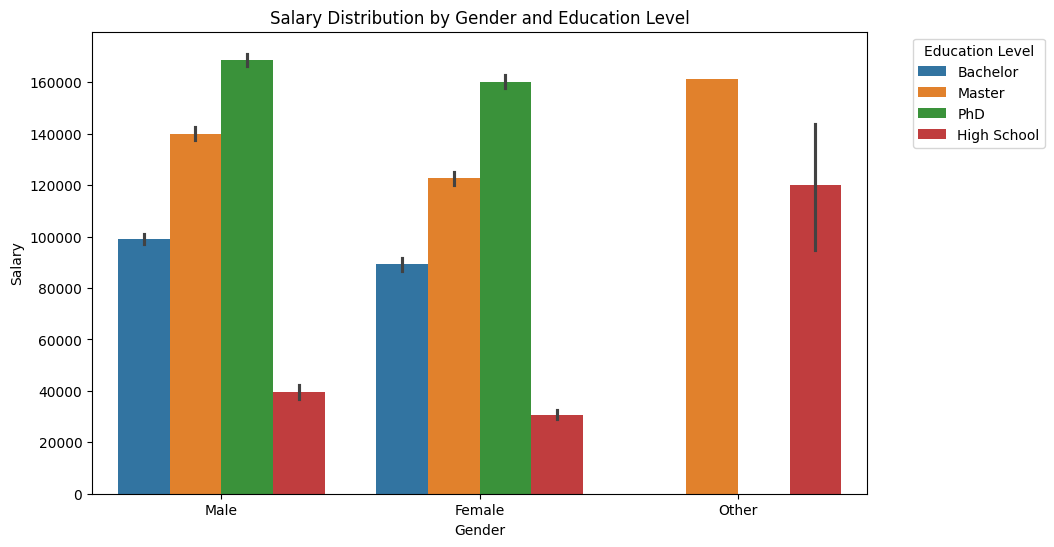

In [196]:

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Gender', y='Salary', hue='Education Level', data=df)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary Distribution by Gender and Education Level')

# Show the plot
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Heatmap for Correlation Analysis - Identify Multicolinearity

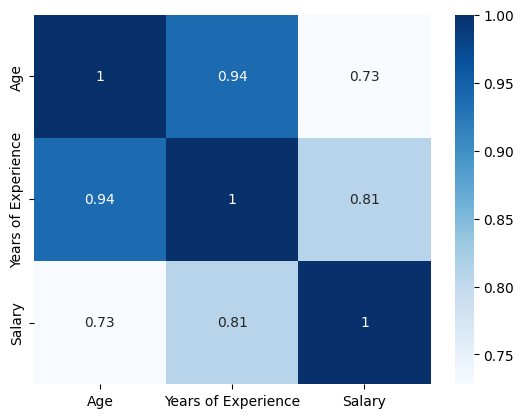

In [201]:
sns.heatmap(df[num_col].corr(), annot=True, cmap='Blues')
plt.show()